In [1]:
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt

from scipy import signal

from droplets import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### DIRECTORY LOOP BELOW

In [2]:
directories_with_inputs=['/Users/olofjonsson/Projects/Ice/Droplet_codes/Package/Example_images']#,
dir_for_results = '/Volumes/LaCie Drive/Lab/Results'

/Users/olofjonsson/Projects/Ice/Droplet_codes/Package/Example_images:
found 39 files
sorted
/Users/olofjonsson/Projects/Ice/Droplet_codes/Package/Example_images/1.5mm_53.6ul_254.5kHz.png


NameError: name 'show_diagnostics' is not defined

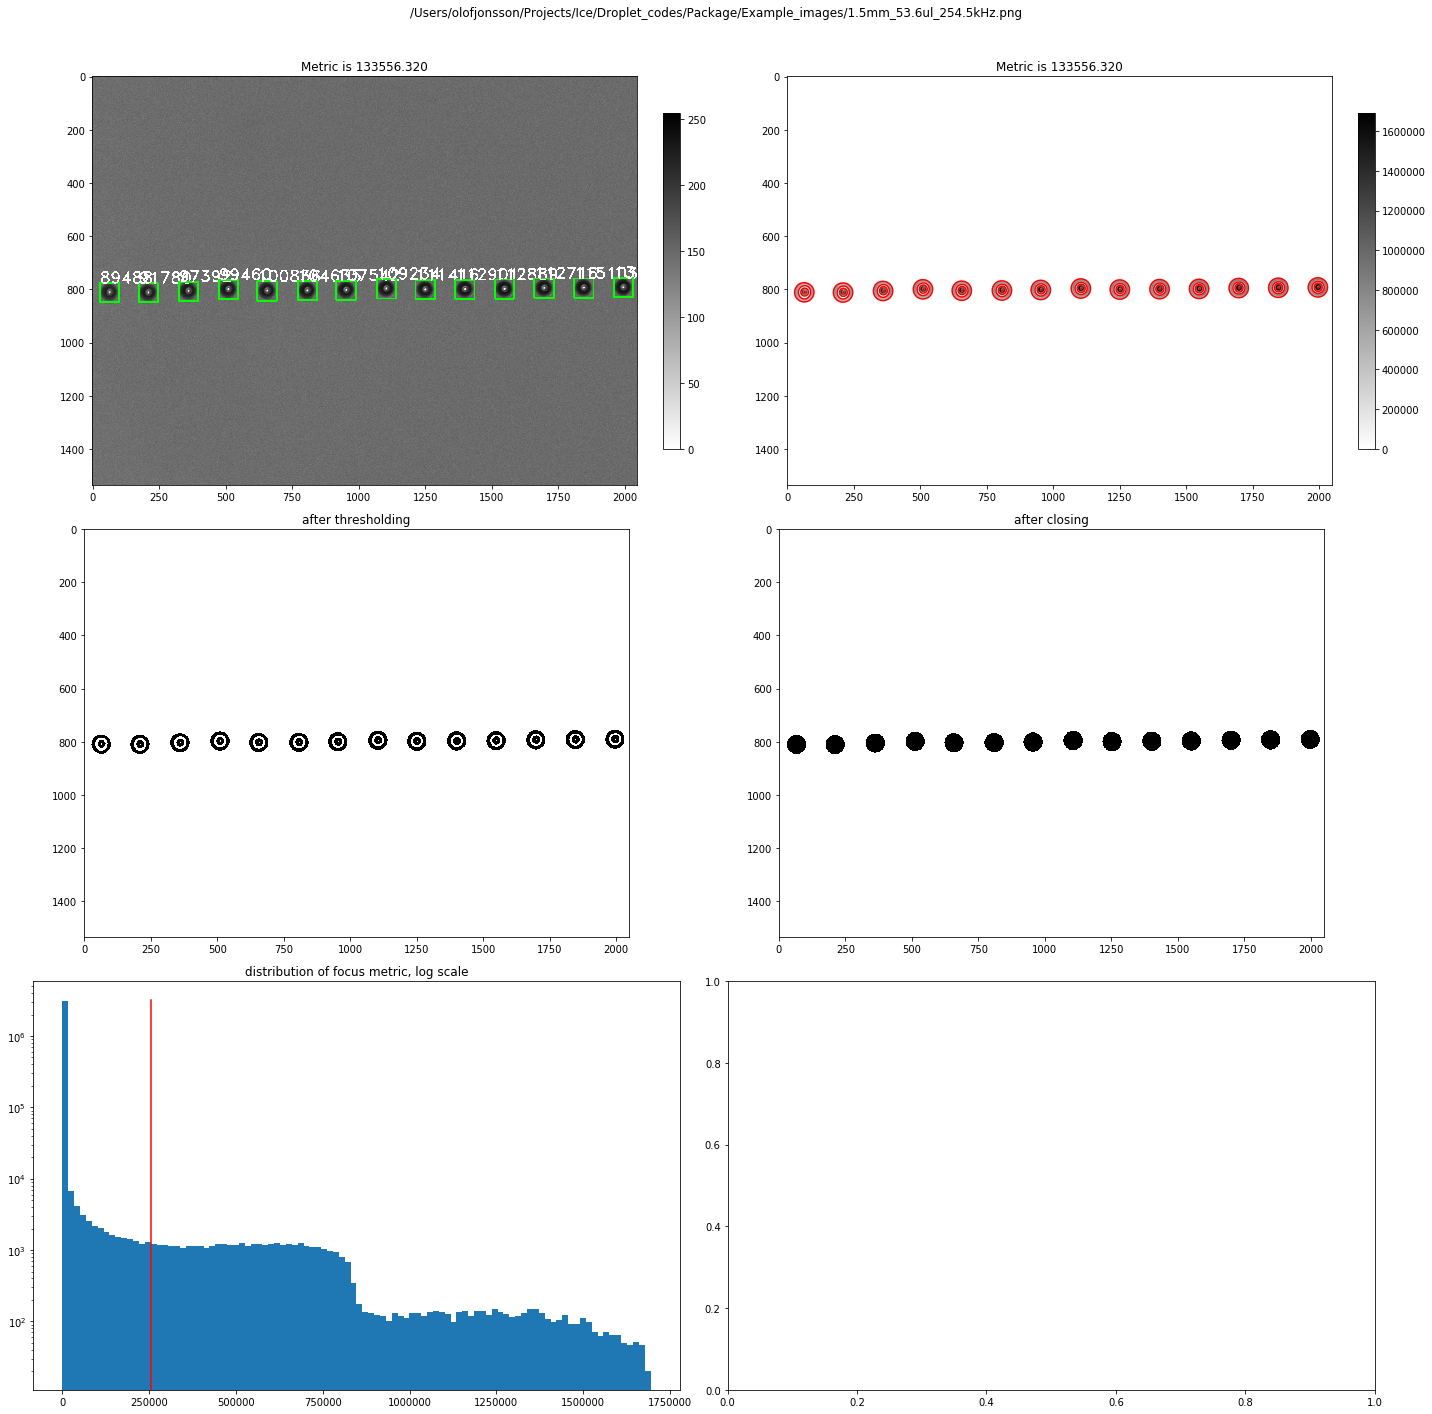

In [3]:
cuts=[]
metrics=[]

for directory_with_input_index, directory_with_input in enumerate(directories_with_inputs):
    path_to_files = directory_with_input
    path_to_results = '/'.join([dir_for_results, 'Cuts' + directory_with_input])
    os.makedirs(path_to_results, exist_ok=True)

    path_to_diagnostics = '/'.join([dir_for_results, 'Diagnostics' + directory_with_input])
    os.makedirs(path_to_diagnostics, exist_ok=True)
    
    list_of_files = [my_file for my_file in os.listdir(
        path_to_files) if not my_file.startswith('.')]  # to avoid hidden files like .DS_file
    print(directory_with_input+':')
    print('found {0} files'.format(str(len(list_of_files))))
    list_of_files.sort()
    print('sorted')

    list_of_files_to_do = list_of_files.copy()[0:3]

    list_of_image_files = []

    for file_index, file_name in enumerate(list_of_files_to_do):
        full_path=os.path.join(path_to_files,file_name)
        #image = cv2.imread(full_path)
        
        print(full_path)

        #temp_file = ImageFile(path_to_files, file_name)
        #metric,cut=GD_metric(image,d_um=2.2)
        show_diagnostics=True
        cuts,metrics,fig=do_cutouts(full_path,d_um=2.2,smallest_size_um2=10000,closing_kernel=30,threshold_fraction=0.15,show_diagnostics=show_diagnostics)
        
        #Make this True if you want to see the cuts
        if False:
            for cut_index,cut in enumerate(cuts):
                plt.figure()
                plt.imshow(cut,cmap='gray',vmin=0,vmax=255)
                #plt.colorbar()
                plt.title('{0:.0f}'.format(metrics[cut_index]))
                
        if True:
            for cut_index,cut in enumerate(cuts):
                cv2.imwrite('{0}/metric_{1:.0f}_cut{2}_{3}'.format(path_to_results,metrics[cut_index],cut_index,file_name),cut)
        
        if show_diagnostics:
            fig.savefig('{0}/diag_{1}'.format(path_to_diagnostics,file_name),format='png')
            plt.close(fig)
        
        #print('{0:.3f}\t {1}'.format(metric,file_name))

### WIDGET BELOW

In [6]:
#path to file to run widget on
file_path='/Users/olofjonsson/Projects/Ice/Droplet_codes/Package/Example_images/255kHz_48ulpermin-06012020122750-15.png'

In [7]:
def test_params(path_to_image,
               threshold_fraction=0.15,
               closing_kernel=30,
               smallest_size_um2=10000,
               d_um=2.2,
               scaling=0.345):
    cuts,metrics,fig=do_cutouts(path_to_image=path_to_image,d_um=d_um,closing_kernel=closing_kernel,threshold_fraction=threshold_fraction,scaling=scaling,show_diagnostics=True)
    fig.show()


_=interact(test_params,path_to_image=fixed(file_path),
         d_um=widgets.FloatSlider(min=0.1,max=100,value=2.2),
         closing_kernel=widgets.IntSlider(min=1,max=100,value=30),
         smallest_size_um2=widgets.FloatSlider(min=1,max=1e6,value=10000),
         threshold_fraction=widgets.FloatSlider(min=0.01,max=1,value=0.15),
         scaling=fixed(0.345))

interactive(children=(FloatSlider(value=0.15, description='threshold_fraction', max=1.0, min=0.01), IntSlider(…